In [6]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 45.9 MB/s eta 

In [3]:
import pandas as pd

# Load the dataset
cars_data = pd.read_csv('/content/cars_dataset.csv')

# Display the first few rows
cars_data.head()

,Car_ID,Brand,Model,Category,Year,Price,Fuel_Type,Mileage
0,0,Toyota,Corolla,Coupe,2021,39.59,Petrol,29.73
1,1,Chevrolet,Impala,Coupe,2022,22.54,Petrol,19.37
2,2,Chevrolet,Tahoe,Sedan,2020,77.28,Electric,NaN
3,3,Chevrolet,Malibu,Sedan,2022,67.14,Petrol,30.18
4,4,Ford,Fiesta,SUV,2021,42.23,Petrol,34.14


In [4]:
# Check for missing values
missing_values = cars_data.isnull().sum()

missing_values


Car_ID        0
Brand         0
Model         0
Category      0
Year          0
Price         0
Fuel_Type     0
Mileage      33
dtype: int64

In [5]:
# Fill missing values in Mileage column with its median
median_mileage = cars_data['Mileage'].median()
cars_data['Mileage'].fillna(median_mileage, inplace=True)

# Check if there are any missing values left
missing_values_after_fill = cars_data.isnull().sum()

missing_values_after_fill



Car_ID       0
Brand        0
Model        0
Category     0
Year         0
Price        0
Fuel_Type    0
Mileage      0
dtype: int64

In [6]:
# Drop the Car_ID column
cars_data.drop('Car_ID', axis=1, inplace=True)

# Display the first few rows after dropping the column
cars_data.head()


,Brand,Model,Category,Year,Price,Fuel_Type,Mileage
0,Toyota,Corolla,Coupe,2021,39.59,Petrol,29.73
1,Chevrolet,Impala,Coupe,2022,22.54,Petrol,19.37
2,Chevrolet,Tahoe,Sedan,2020,77.28,Electric,25.15
3,Chevrolet,Malibu,Sedan,2022,67.14,Petrol,30.18
4,Ford,Fiesta,SUV,2021,42.23,Petrol,34.14


In [9]:
from pycaret.regression import *

# Initialize the PyCaret environment
reg_setup = setup(data=cars_data, target='Price', session_id=123, verbose=False)



In [10]:
compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,18.9451,522.4073,22.1830,-0.2870,0.4174,0.4040,0.1020
en,Elastic Net,20.2267,557.4558,23.3239,-0.3221,0.4356,0.4524,0.1890
dummy,Dummy Regressor,20.2944,549.5284,23.2509,-0.3259,0.4325,0.4467,0.1870
br,Bayesian Ridge,20.4798,563.6514,23.4993,-0.3456,0.4381,0.4534,0.1800
lasso,Lasso Regression,20.2395,568.8732,23.5104,-0.3487,0.4374,0.4522,0.1840
llar,Lasso Least Angle Regression,20.2395,568.8743,23.5104,-0.3487,0.4374,0.4522,0.0970
lightgbm,Light Gradient Boosting Machine,20.5356,577.8471,23.7394,-0.3688,0.4394,0.4554,0.1720
catboost,CatBoost Regressor,19.7445,570.9098,23.3047,-0.3723,0.4331,0.4313,0.8070
omp,Orthogonal Matching Pursuit,21.0936,611.8151,24.2975,-0.4282,0.4497,0.4695,0.0950
rf,Random Forest Regressor,20.5378,626.5249,24.5000,-0.4834,0.4555,0.4503,0.4650


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

KNeighborsRegressor(n_jobs=-1)

In [11]:
rf_model = create_model('rf')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18.6691,672.5612,25.9338,-1.7376,0.3856,0.2186
1,30.6687,1164.0958,34.1188,-0.9061,0.5758,0.5727
2,26.9339,1089.7599,33.0115,-1.0074,0.6679,0.7746
3,20.9032,467.4107,21.6197,0.1472,0.3256,0.3159
4,16.0402,375.3471,19.3739,-0.2439,0.4058,0.4222
5,20.5234,520.7216,22.8193,-0.3859,0.4638,0.4922
6,18.3033,566.0261,23.7913,-0.0103,0.4217,0.3793
7,14.1655,293.8035,17.1407,-0.2358,0.3313,0.2951
8,20.8958,605.1445,24.5997,-0.0083,0.4386,0.4074


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [12]:
tuned_rf = tune_model(rf_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17.8659,480.5472,21.9214,-0.9560,0.2964,0.2122
1,27.2723,843.8014,29.0483,-0.3817,0.4894,0.5022
2,24.6109,917.0256,30.2824,-0.6892,0.6283,0.7512
3,21.3745,536.8967,23.1710,0.0204,0.3399,0.3231
4,16.6036,398.1798,19.9544,-0.3196,0.4315,0.4593
5,20.6938,519.1094,22.7840,-0.3816,0.4664,0.5046
6,19.4767,553.2568,23.5214,0.0125,0.4083,0.3777
7,13.0344,207.4426,14.4029,0.1274,0.2722,0.2659
8,18.8058,463.0637,21.5189,0.2284,0.3956,0.3888


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


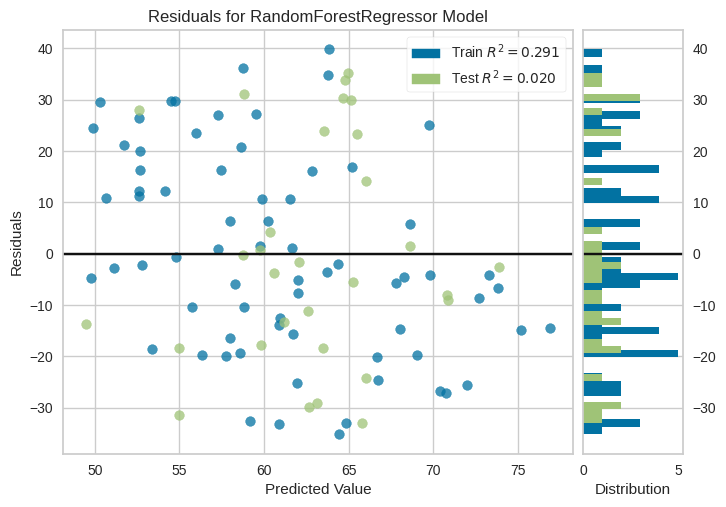

In [13]:
plot_model(tuned_rf, plot='residuals')


In [14]:
predictions = predict_model(tuned_rf, data=cars_data)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,16.7164,395.9541,19.8986,0.2196,0.3802,0.3659


In [15]:
final_model = finalize_model(tuned_rf)


In [16]:
save_model(final_model, 'final_rf_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year', 'Mileage'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Brand', 'Model', 'Category',
                                              'Fuel_Type'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Brand', 'Model', 'Category',
                                              'Fuel_Type'],
                                     transformer=OneHotEncoder(cols=['Brand',
                                                                     'Model',
                                                                     'Category',
                                                                     'Fuel_Type'],
                         